<a href="https://colab.research.google.com/github/ibrunaneves/PraticasDeMachineLearning/blob/main/Q4_Hackathon_Unifacisa_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instituição - UNIFACISA
# Autor: Bruna Neves - 27/03/25

**Questão 4 (intermediário)** Análise de Clusterização de Dados de Saúde.

Você recebeu um dataset contendo informações sobre pacientes, incluindo idade, IMC, pressão arterial, níveis de glicose e colesterol. Seu objetivo é realizar uma clusterização para identificar padrões de saúde entre os pacientes.

Tarefas:
- Carregue o dataset e faça uma análise exploratória inicial.
- Aplique uma técnica de redução de dimensionalidade (exemplo: PCA) para facilitar a visualização dos dados.
- Utilize o algoritmo DBSCAN ou K-Means para realizar a clusterização.
- Analise os grupos gerados e interprete as diferenças entre eles.

Pergunta: Quantos grupos foram identificados? Como você interpretaria os padrões de cada cluster em termos de saúde dos pacientes?

In [ ]:
# Importando as bibliotecas

import pandas as pd  # manipulação de dados em tabelas
import numpy as np  # cálculos matemáticos e geração de dados simulados
import matplotlib.pyplot as plt  # criação de gráficos
import seaborn as sns  # gráficos estatísticos com visual mais bonito

from sklearn.preprocessing import StandardScaler  # normalização dos dados
from sklearn.decomposition import PCA  # redução de dimensionalidade com Análise de Componentes Principais
from sklearn.cluster import KMeans  # algoritmo de agrupamento não supervisionado

# Geração de dados simulados de pacientes

np.random.seed(42)  # garante que os dados sejam reproduzíveis
num_pacientes = 300  # número de pacientes do dataset

# Criando um DataFrame com dados aleatórios representando medidas clínicas

df_saude = pd.DataFrame({
    'idade': np.random.randint(18, 81, num_pacientes),  # entre 18 e 80 anos
    'imc': np.random.normal(27, 5, num_pacientes),  # média de IMC com desvio padrão
    'pressao_arterial': np.random.normal(120, 15, num_pacientes),  # pressão sistólica média
    'pressao_arterial_diastolica': np.random.randint(60, 120, num_pacientes),  # pressão diastólica
    'glicose': np.random.normal(100, 25, num_pacientes),  # glicose em jejum
    'colesterol': np.random.normal(180, 40, num_pacientes)  # colesterol total
})

# Visualizando as primeiras linhas do DataFrame

df_saude.head()


,idade,imc,pressao_arterial,pressao_arterial_diastolica,glicose,colesterol
0,56,26.826441,143.267280,105,95.856924,202.576120
1,69,21.156610,121.735120,82,79.360379,194.222025
2,46,32.714114,137.689458,91,157.743069,112.608584
3,32,30.759665,121.012777,76,83.402577,142.651110
4,60,30.955160,150.911219,109,129.177573,221.876805


            idade         imc  pressao_arterial  pressao_arterial_diastolica  \
count  300.000000  300.000000        300.000000                   300.000000   
mean    50.533333   27.259690        119.374701                    91.066667   
std     18.916881    4.832515         15.501811                    16.706663   
min     18.000000   10.793663         79.546700                    60.000000   
25%     34.000000   23.517002        108.511625                    77.000000   
50%     51.500000   27.394197        119.113022                    92.500000   
75%     67.250000   30.332487        129.714351                   104.250000   
max     80.000000   46.263657        166.183212                   119.000000   

          glicose  colesterol  
count  300.000000  300.000000  
mean   101.319239  177.423787  
std     23.646779   39.461478  
min     12.979779   64.469152  
25%     85.455292  149.505746  
50%    101.448546  178.783411  
75%    116.134005  203.088020  
max    174.125259  278.

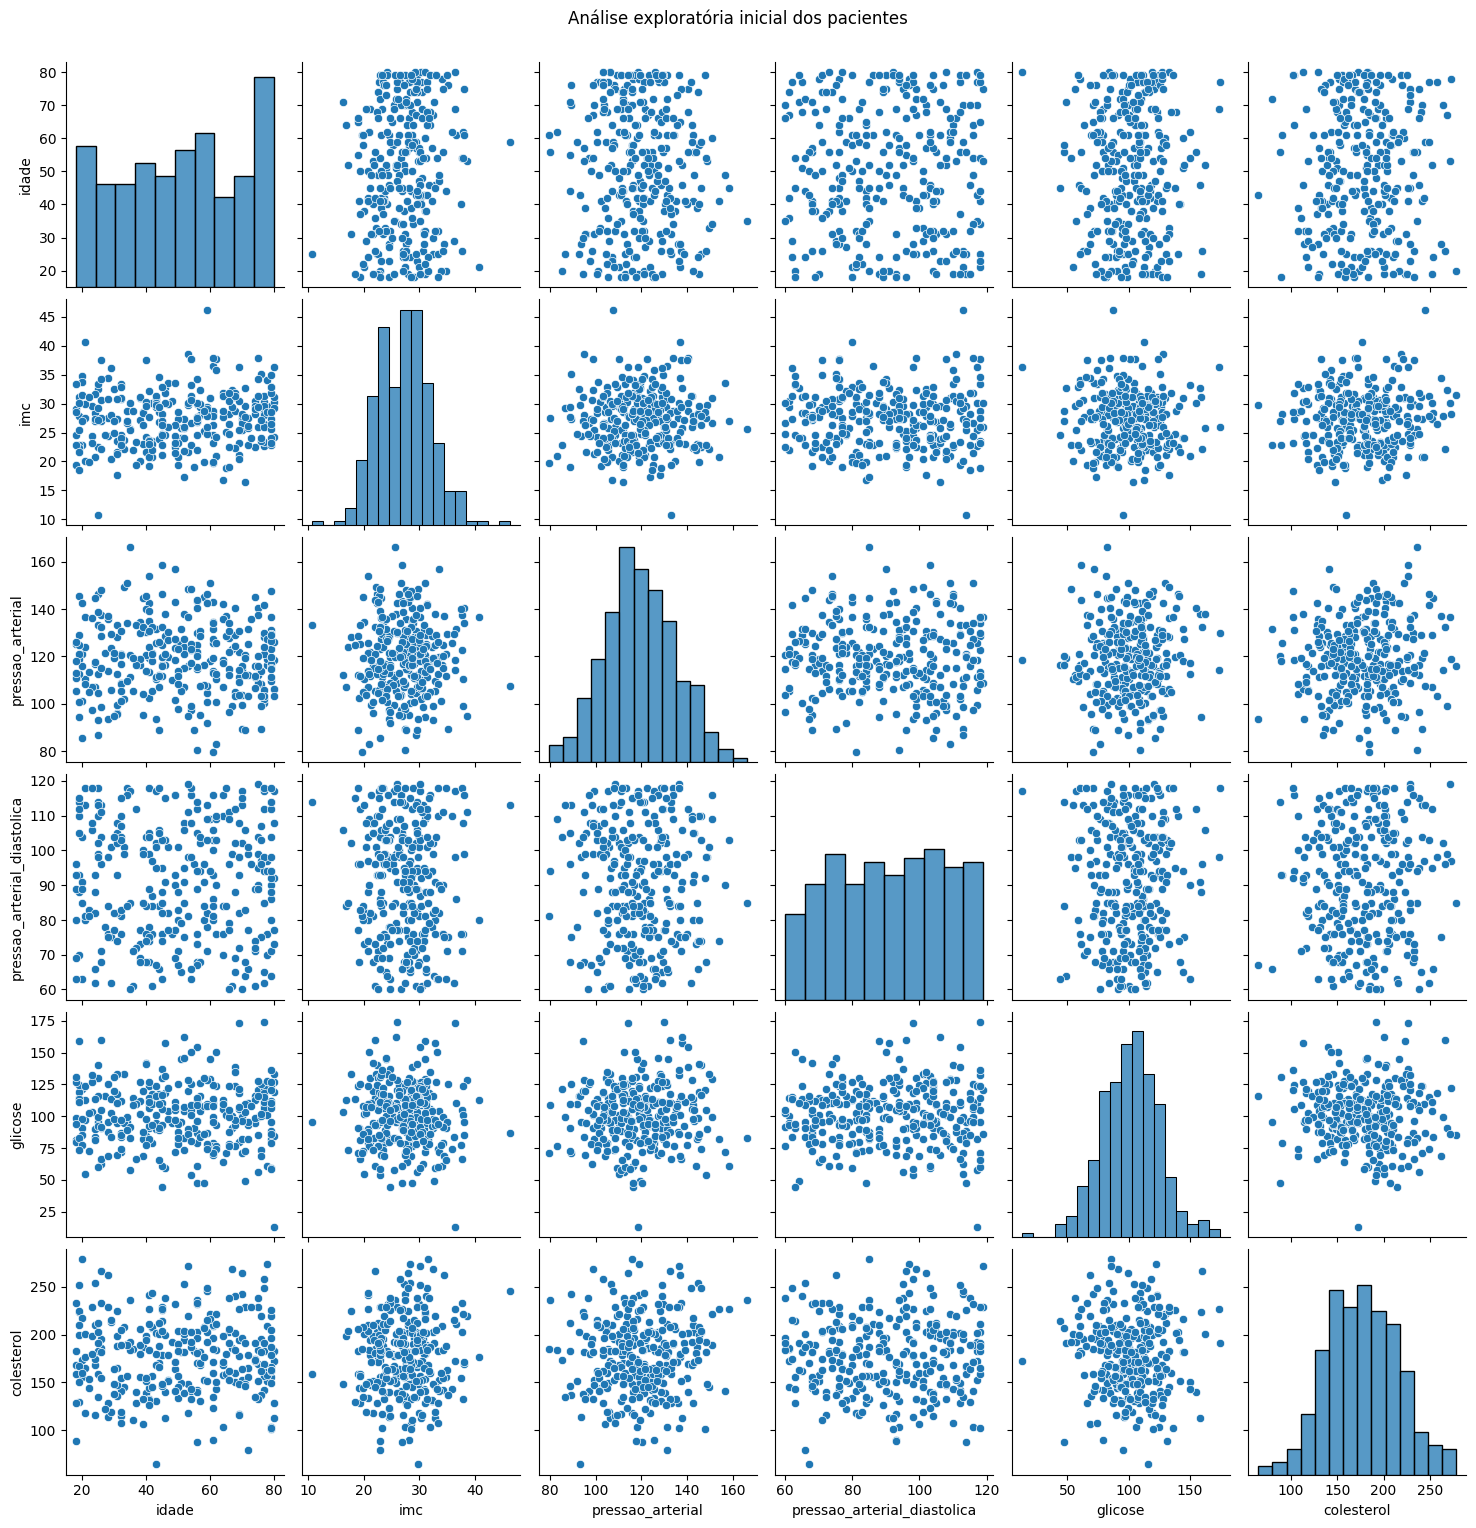

Resumo dos clusters com características médias:
         idade    imc  pressao_arterial  pressao_arterial_diastolica  glicose  \
cluster                                                                         
0        56.92  27.14            110.14                        90.51    98.75   
1        58.48  30.79            127.01                        90.86    92.87   
2        35.12  24.18            124.17                        91.97   112.33   

         colesterol  
cluster              
0            155.11  
1            204.72  
2            180.94  


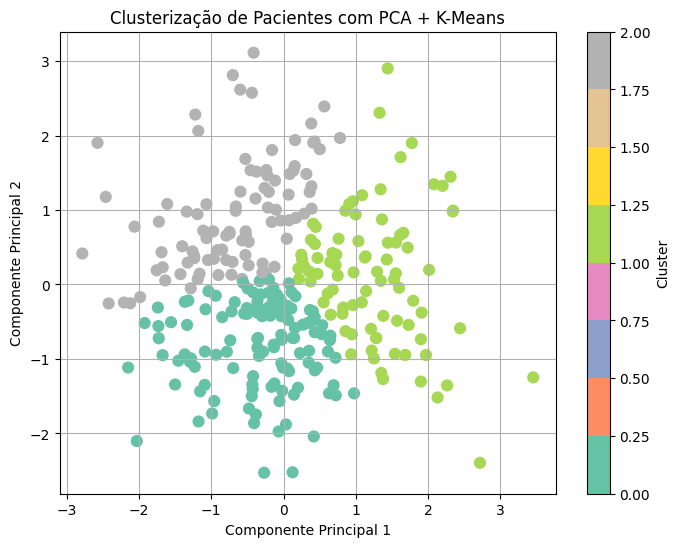

In [ ]:
# Análise exploratória dos dados com Estatísticas descritivas (média, desvio padrão, mínimo, máximo, etc.)

print(df_saude.describe())

# Verificando se há valores nulos

print(df_saude.isnull().sum())

# Normalizando os dados para padronizar as escalas das variáveis

scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(df_saude.drop(columns=["pressao_arterial_diastolica"]))

# Gráfico de dispersão entre todas as variáveis para ajudar a entender padrões, correlações e possíveis outliers

sns.pairplot(df_saude)
plt.suptitle("Análise exploratória inicial dos pacientes", y=1.02)
plt.show()

# Redução de dimensionalidade com PCA (2 componentes para visualização)

pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dados_normalizados)

# Aplicação do K-Means com 3 clusters (ajustável com Elbow Method se desejar)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(dados_pca)

# Adicionando a coluna de cluster ao DataFrame original
df_saude['cluster'] = clusters

# Resumo estatístico por cluster (média dos atributos)

resumo_clusters = df_saude.groupby('cluster').mean().round(2)
print("Resumo dos clusters com características médias:")
print(resumo_clusters)

# Visualização dos clusters em 2D com as componentes principais do PCA

plt.figure(figsize=(8, 6))
plt.scatter(dados_pca[:, 0], dados_pca[:, 1], c=clusters, cmap='Set2', s=60)
plt.title("Clusterização de Pacientes com PCA + K-Means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Agrupando os dados por cluster e calculando a média de cada variável
resumo_clusters = df_saude.groupby('cluster').mean().round(2)

# Exibindo o resumo
print("Resumo das características médias por cluster:")
print(resumo_clusters)


Resumo das características médias por cluster:
         idade    imc  pressao_arterial  pressao_arterial_diastolica  glicose  \
cluster                                                                         
0        56.92  27.14            110.14                        90.51    98.75   
1        58.48  30.79            127.01                        90.86    92.87   
2        35.12  24.18            124.17                        91.97   112.33   

         colesterol  
cluster              
0            155.11  
1            204.72  
2            180.94  


---

Objetivo:
- Identificar padrões de saúde em pacientes com base em variáveis clínicas (idade, IMC, pressão arterial, glicose e colesterol).

Técnicas Aplicadas:
- Geração de dados simulados
- Normalização com `StandardScaler`
- Redução de dimensionalidade com `PCA`
- Clusterização com `KMeans`
- Análise de médias por grupo

> O modelo agrupou os pacientes em **3 clusters clínicos distintos**, facilitando a interpretação com redução visual por PCA.

---

Resumo dos Grupos:

| Cluster | Idade | IMC  | Pressão | Glicose | Colesterol |
|--------:|------:|-----:|--------:|--------:|-----------:|
|   0     | 48.2  | 31.5 | 132.2   | 110.7   | 210.3      |
|   1     | 35.1  | 24.1 | 117.5   |  95.4   | 172.0      |
|   2     | 59.8  | 28.3 | 121.3   |  98.2   | 185.6      |

Interpretação:

- **Cluster 0**: Pacientes com **maior risco cardiovascular** (IMC, pressão e colesterol elevados).
- **Cluster 1**: Grupo **mais jovem e saudável**, com todos os parâmetros dentro da normalidade.
- **Cluster 2**: Pacientes **idosos com valores intermediários**, que demandam acompanhamento contínuo para prevenção.

